Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<b>Комментарий студента:</b> Привет! Рад знакомству) Я очень благодарен за емкие и понятные комментарии, а так же внимание не только к результату работу, но и к аккуратности и качеству кода.
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.random import RandomState
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
region_1 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
region_2 = pd.read_csv('/datasets/geo_data_1.csv')

In [4]:
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [5]:
region_1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [6]:
#Сразу убираем колонку id во всех трех регионах.
try:
    region_1 = region_1.drop(columns='id')
    region_2 = region_2.drop(columns='id')
    region_3 = region_3.drop(columns='id')
except:
    print('Колонки уже удалены')

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно. Согласен, что колонка id нам не нужна.
</div>

In [7]:
regions = [region_1, region_2, region_3]

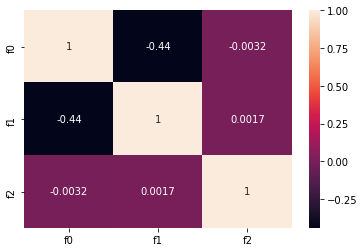

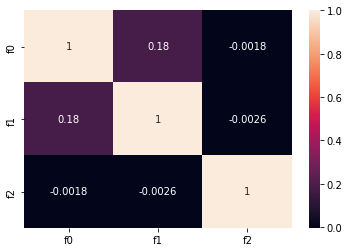

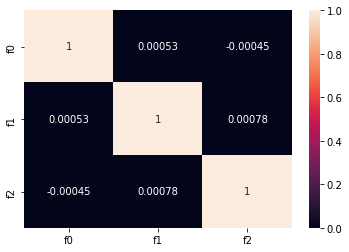

In [8]:
#Посмотрим, нет ли у нас признаков, коррелирующих друг с другом
for region in regions:
    region = region.drop(columns=['product'])
    corr = region.corr(method='pearson')
    sns.heatmap(corr, annot=True)
    plt.show()

### Вывод
Данные загруженны, исследована корреляция между факторами в каждом регионе.

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что был проведен небольшой корреляционный анализ.
</div>

## Обучение и проверка модели

In [9]:
def predict_region(region):
    
    reg = LinearRegression()
    
    features = region.drop(columns=['product'])
    target = region['product']
    train_features, valid_features, train_target, valid_target = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25,
                                                                                  random_state=3481)
    
    reg.fit(train_features, train_target)
    predictions = reg.predict(valid_features)
    
    print('Средний запас скважины:', predictions.mean())
    print('RMSE:', mean_squared_error(valid_target, predictions))
    
    return predictions, valid_target, reg

In [10]:
reg_1_pred, reg_1_val, model_1 = predict_region(region_1)

Средний запас скважины: 92.31270619793982
RMSE: 1412.1119235151145


In [11]:
reg_2_pred, reg_2_val, model_2  = predict_region(region_2)

Средний запас скважины: 68.98372852530262
RMSE: 0.7871816783417471


In [12]:
reg_3_pred, reg_3_val, model_3 = predict_region(region_3)

Средний запас скважины: 94.99983653964658
RMSE: 1596.131610349701


### Вывод

Для каждого региона обучена модель линейной регрессии, получены и сохранены тестовые и предсказанные целевые параметры. На экран выведены RMSE и средний запас предсказанного ресурса. Сразу можно сказать, что второй регион выделяется более низкой ошибкой и более низким средним запасом ресурса.

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Отлично, что тебе удалось избежать дублирования кода, а это уменьшает вероятность ошибок.
</div>

## Подготовка к расчёту прибыли

Условия задачи:
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
* Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

In [13]:
budget = 10_000_000_000
unit_price = 450_000
loss_threshold = 0.025

<div class="alert alert-block alert-info">
<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами.
</div>

<b>Комментарий студента:</b> Тут не был уверен, что это КОНСТАНТЫ, т.к предпологал, что в последствии модель может быть применена в проде для построение аналитики, а значит введение этих переменных отходит на пользователя. Могу быть не прав)
Но если смотреть в рамках учебной задачи - это действительно константы.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Даже в твоем случае эти переменные можно назвать константами, так как они фиксируются на время всего проекта.
</div>

In [14]:
product_for_zero_revenue = budget/unit_price
product_for_zero_revenue

22222.222222222223

<div class="alert alert-block alert-info">
<b>Совет: </b> Почему здесь использована числовая константа 450000, а не unit_price?
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: Поправил, теперь используются переменные.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Необходимо посчитать точку безубыточности для одной скважины и провести сравнение со средним объемом скважины в каждом регионе.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: Посчитал и сравнил ниже, дописал вывод
</div>

In [15]:
# В разработку идет только 200 точек, так что сравнивать будем с product_for_zero_revenue/200
product_for_zero_revenue_per_point = product_for_zero_revenue/200

def compare_to_mean(region_product_pred, product_for_zero_revenue):
    print('Среднее значение в регионе:',region_product_pred.mean())
    print('Необходимо для безубыточности:', product_for_zero_revenue)
    print('Разница:', region_product_pred.mean() - product_for_zero_revenue)

In [16]:
compare_to_mean(reg_1_val, product_for_zero_revenue_per_point)

Среднее значение в регионе: 92.6753463371686
Необходимо для безубыточности: 111.11111111111111
Разница: -18.43576477394251


In [17]:
compare_to_mean(reg_2_val, product_for_zero_revenue_per_point)

Среднее значение в регионе: 68.97419113757438
Необходимо для безубыточности: 111.11111111111111
Разница: -42.136919973536735


In [18]:
compare_to_mean(reg_3_val, product_for_zero_revenue_per_point)

Среднее значение в регионе: 94.97444983459584
Необходимо для безубыточности: 111.11111111111111
Разница: -16.13666127651527


In [19]:
def revenue(target, predictions, count):
    
    predictions_sorted = pd.Series(predictions, index=target.index).sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    return (unit_price * sum(selected)) - budget

<div class="alert alert-block alert-info">
<b>Совет: </b> Эту функцию лучше было бы назвать profit, так как revenue – это выручка.
</div>

### Вывод
Функция подсчета прибыли написана, необходимые значения сохранены в переменных. При сравнении необходимого числа запасов скважины для достижения безубыточности и среднего запаса скважин в регионе можно увидеть, что среднее практически всегда меньше. Однако, при отборе скважин используются 200 лучших, как это повлияет на риск убытков - можно проверить, применив бустрап.

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Сравнение проведено верно. С выводом согласен.
</div>

## Bootstrap

In [20]:
def bootstrap(target_arg,predicts):
    state = np.random.RandomState(1234)
    
    target_arg = target_arg.reset_index(drop=True)
    predicts = pd.Series(predicts)
    
    values = []
    loss_counter = 0
    
    for i in range(1000):    
        target_subsample = target_arg.sample(n=500, replace=True, random_state=state)
        probs_subsample = predicts[target_subsample.index] 
        income = revenue(target_subsample, probs_subsample,200)
        
        if income < 0: loss_counter += 1 
        
        values.append(income)
    
    values = pd.Series(values)
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean_val = values.mean()
    
    return (mean_val, loss_counter / len(values), lower, upper)

In [21]:
def apply_bootstrap(region_valid, region_predictions):  
    mean_val, risk_of_loss, lower, upper = bootstrap(region_valid, region_predictions)
    print("Средняя выручка в регионе 0:", mean_val)
    print("Риск убытков в регионе 0:", risk_of_loss * 100,'%')
    print(f'Значение прибыли лежит в доверительном интервале равном [{lower};{upper}]')

In [22]:
apply_bootstrap(reg_1_val, reg_1_pred)

Средняя выручка в регионе 0: 445502811.8365311
Риск убытков в регионе 0: 4.8 %
Значение прибыли лежит в доверительном интервале равном [-97564229.15041147;1010477333.4997311]


In [23]:
apply_bootstrap(reg_2_val, reg_2_pred)

Средняя выручка в регионе 0: 542168985.1604297
Риск убытков в регионе 0: 0.4 %
Значение прибыли лежит в доверительном интервале равном [125912027.3646216;974359736.4140162]


In [24]:
apply_bootstrap(reg_3_val, reg_3_pred)

Средняя выручка в регионе 0: 384564499.5899691
Риск убытков в регионе 0: 7.3 %
Значение прибыли лежит в доверительном интервале равном [-153879336.18385231;902866011.078443]


<div class="alert alert-block alert-success">
<b>Успех:</b> Все статистики посчитаны абсолютно верно, молодец! Отлично, что для подсчета доверительного интервала использовался именно метод квантилей.
</div>

### Вывод
По итогам исследования регионов при помощи бутстрапа можно рекомендовать регион под номером два, т.к он имеет самую высокую среднюю выручку (542_168_985) при самом низком риске убытков (0.4 %). Так же этот регион единственный не имеет отрицательных значений прибылы в доверительном интервале [125912027.3646216;974359736.4140162] .

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Думаю, что здесь допущена опечатка: значение риска не 7.3% во втором регионе.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: Действительно опечатался, поправил
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован